# Plots for binary mass and period

## stellar mass value: stm= 3.47e10 solar masses
### assuming equal mass: mass of one SMBH:  3.47e10/2
### Assume circular orbit


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c
from astropy import constants as ac
from astropy import units as u
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
## Define the model used
def kep_bsmbh_model(p, stm): 
    sin3=2/3 #estimate
    numerator = (stm) * 2 * c.pi * c.G * sin3
    denominator = p
    cube_root = (numerator / denominator) ** (1/3)
    delta_v = cube_root 
    return delta_v

In [3]:
## do a test with a single period value and stellar mass (use astropy units for the conversions)
P = 469183.45106077986*u.year
stm = 63037531530.71268*u.M_sun
stm=stm.to(u.kg).value
P=P.to(u.s).value

In [4]:
dv = kep_bsmbh_model(P,stm)*u.m/u.s

In [5]:
dv.to(u.km/u.s)

<Quantity 1332.65458069 km / s>

In [15]:
## Now create the array of values in SI units
size=1000
p_values = (np.logspace(1, 8, size)*u.yr).to(u.s).value  # 50 values between 10^3 and 10^8
stm_values = (np.logspace(10, 13, size)*u.M_sun).to(u.kg).value  # 50 values between 3.47e8 and 3.47e10

In [16]:
## Create the grid of values
P, STM = np.meshgrid(p_values, stm_values)

In [17]:
### Feed into the model
dv = kep_bsmbh_model(P,STM)*(u.m/u.s)
dv = dv.to(u.km/u.s).value

In [18]:
## What is our delta v
v2=1187.4653317495377 #km/s
v1=144.67618434566512
dv_obs=(v1+v2)
print(dv_obs)

1332.1415160952029


In [19]:
closest_idx = np.unravel_index(np.abs(dv-dv_obs).argmin(),(size,size))

In [20]:
P_yr = (P*(u.s)).to(u.yr).value
STM_yr = (STM*(u.kg)).to(u.M_sun).value
P_obs = P_yr[closest_idx[0],closest_idx[1]]
STM_obs = STM_yr[closest_idx[0],closest_idx[1]]

In [21]:
print('Period: %.2e yr, mass: %.2e M_sun' %(P_obs,STM_obs))

Period: 9.10e+04 yr, mass: 1.22e+10 M_sun


<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\l'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_25906/1796768824.py:9: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('BSMBH mass [$M_\odot$]')
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_25906/1796768824.py:13: SyntaxWarning: invalid escape sequence '\l'
  cax.set_xlabel('$\log_{10}(\Delta v$) [km/s]',labelpad=10)


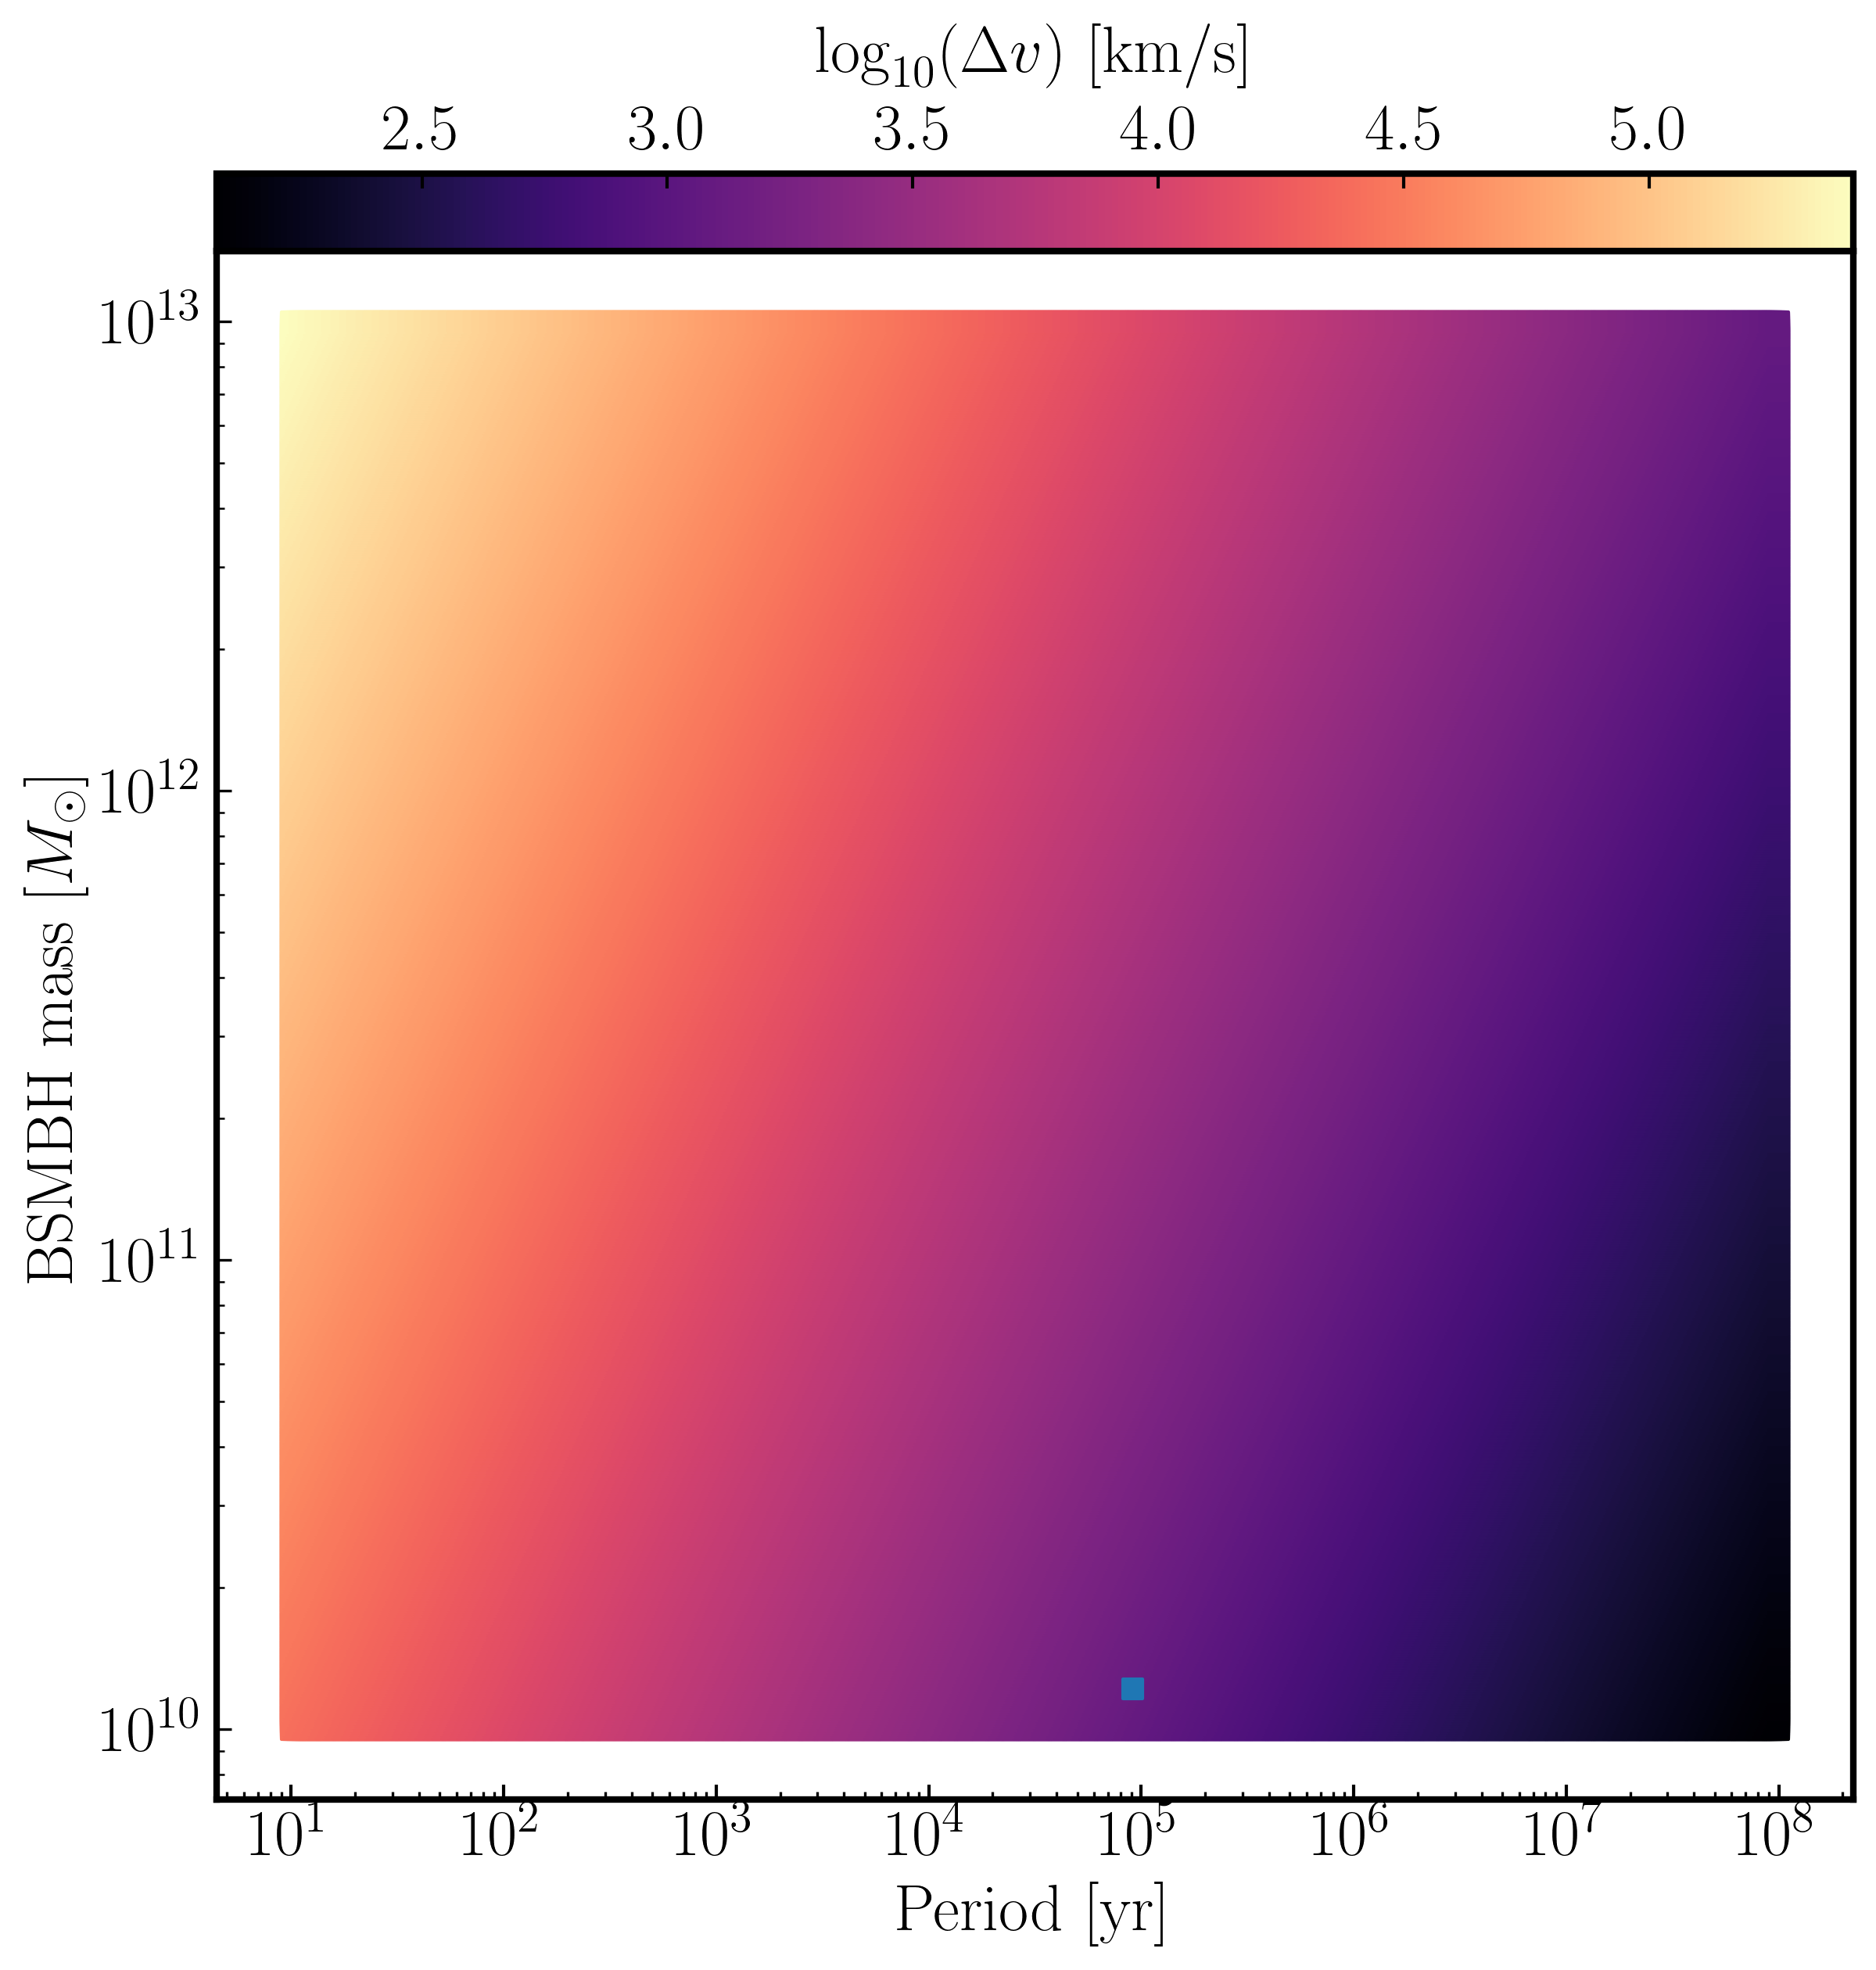

In [22]:
fig = plt.figure(figsize=(9,9))
gs=GridSpec(ncols=1,nrows=2,height_ratios=[1/20,1],hspace=0)
ax = fig.add_subplot(gs[1])
im= ax.scatter(P_yr,STM_yr,c=np.log10(dv))
ax.scatter(P_obs,STM_obs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Period [yr]')
ax.set_ylabel('BSMBH mass [$M_\odot$]')

cax=fig.add_subplot(gs[0])
fig.colorbar(mappable=im,cax=cax,location='top')
cax.set_xlabel('$\log_{10}(\Delta v$) [km/s]',labelpad=10)
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_25906/4043301310.py:11: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('BSMBH mass [$M_\odot$]')
/var/folders/95/2mdwxkv53dg0z1fx0__lvyxw0000gq/T/ipykernel_25906/4043301310.py:15: SyntaxWarning: invalid escape sequence '\l'
  cax.set_xlabel('$\log_{10}([\Delta v_\mathrm{obs} - \Delta v]^2 / \Delta v_\mathrm{obs}$)',labelpad=10)


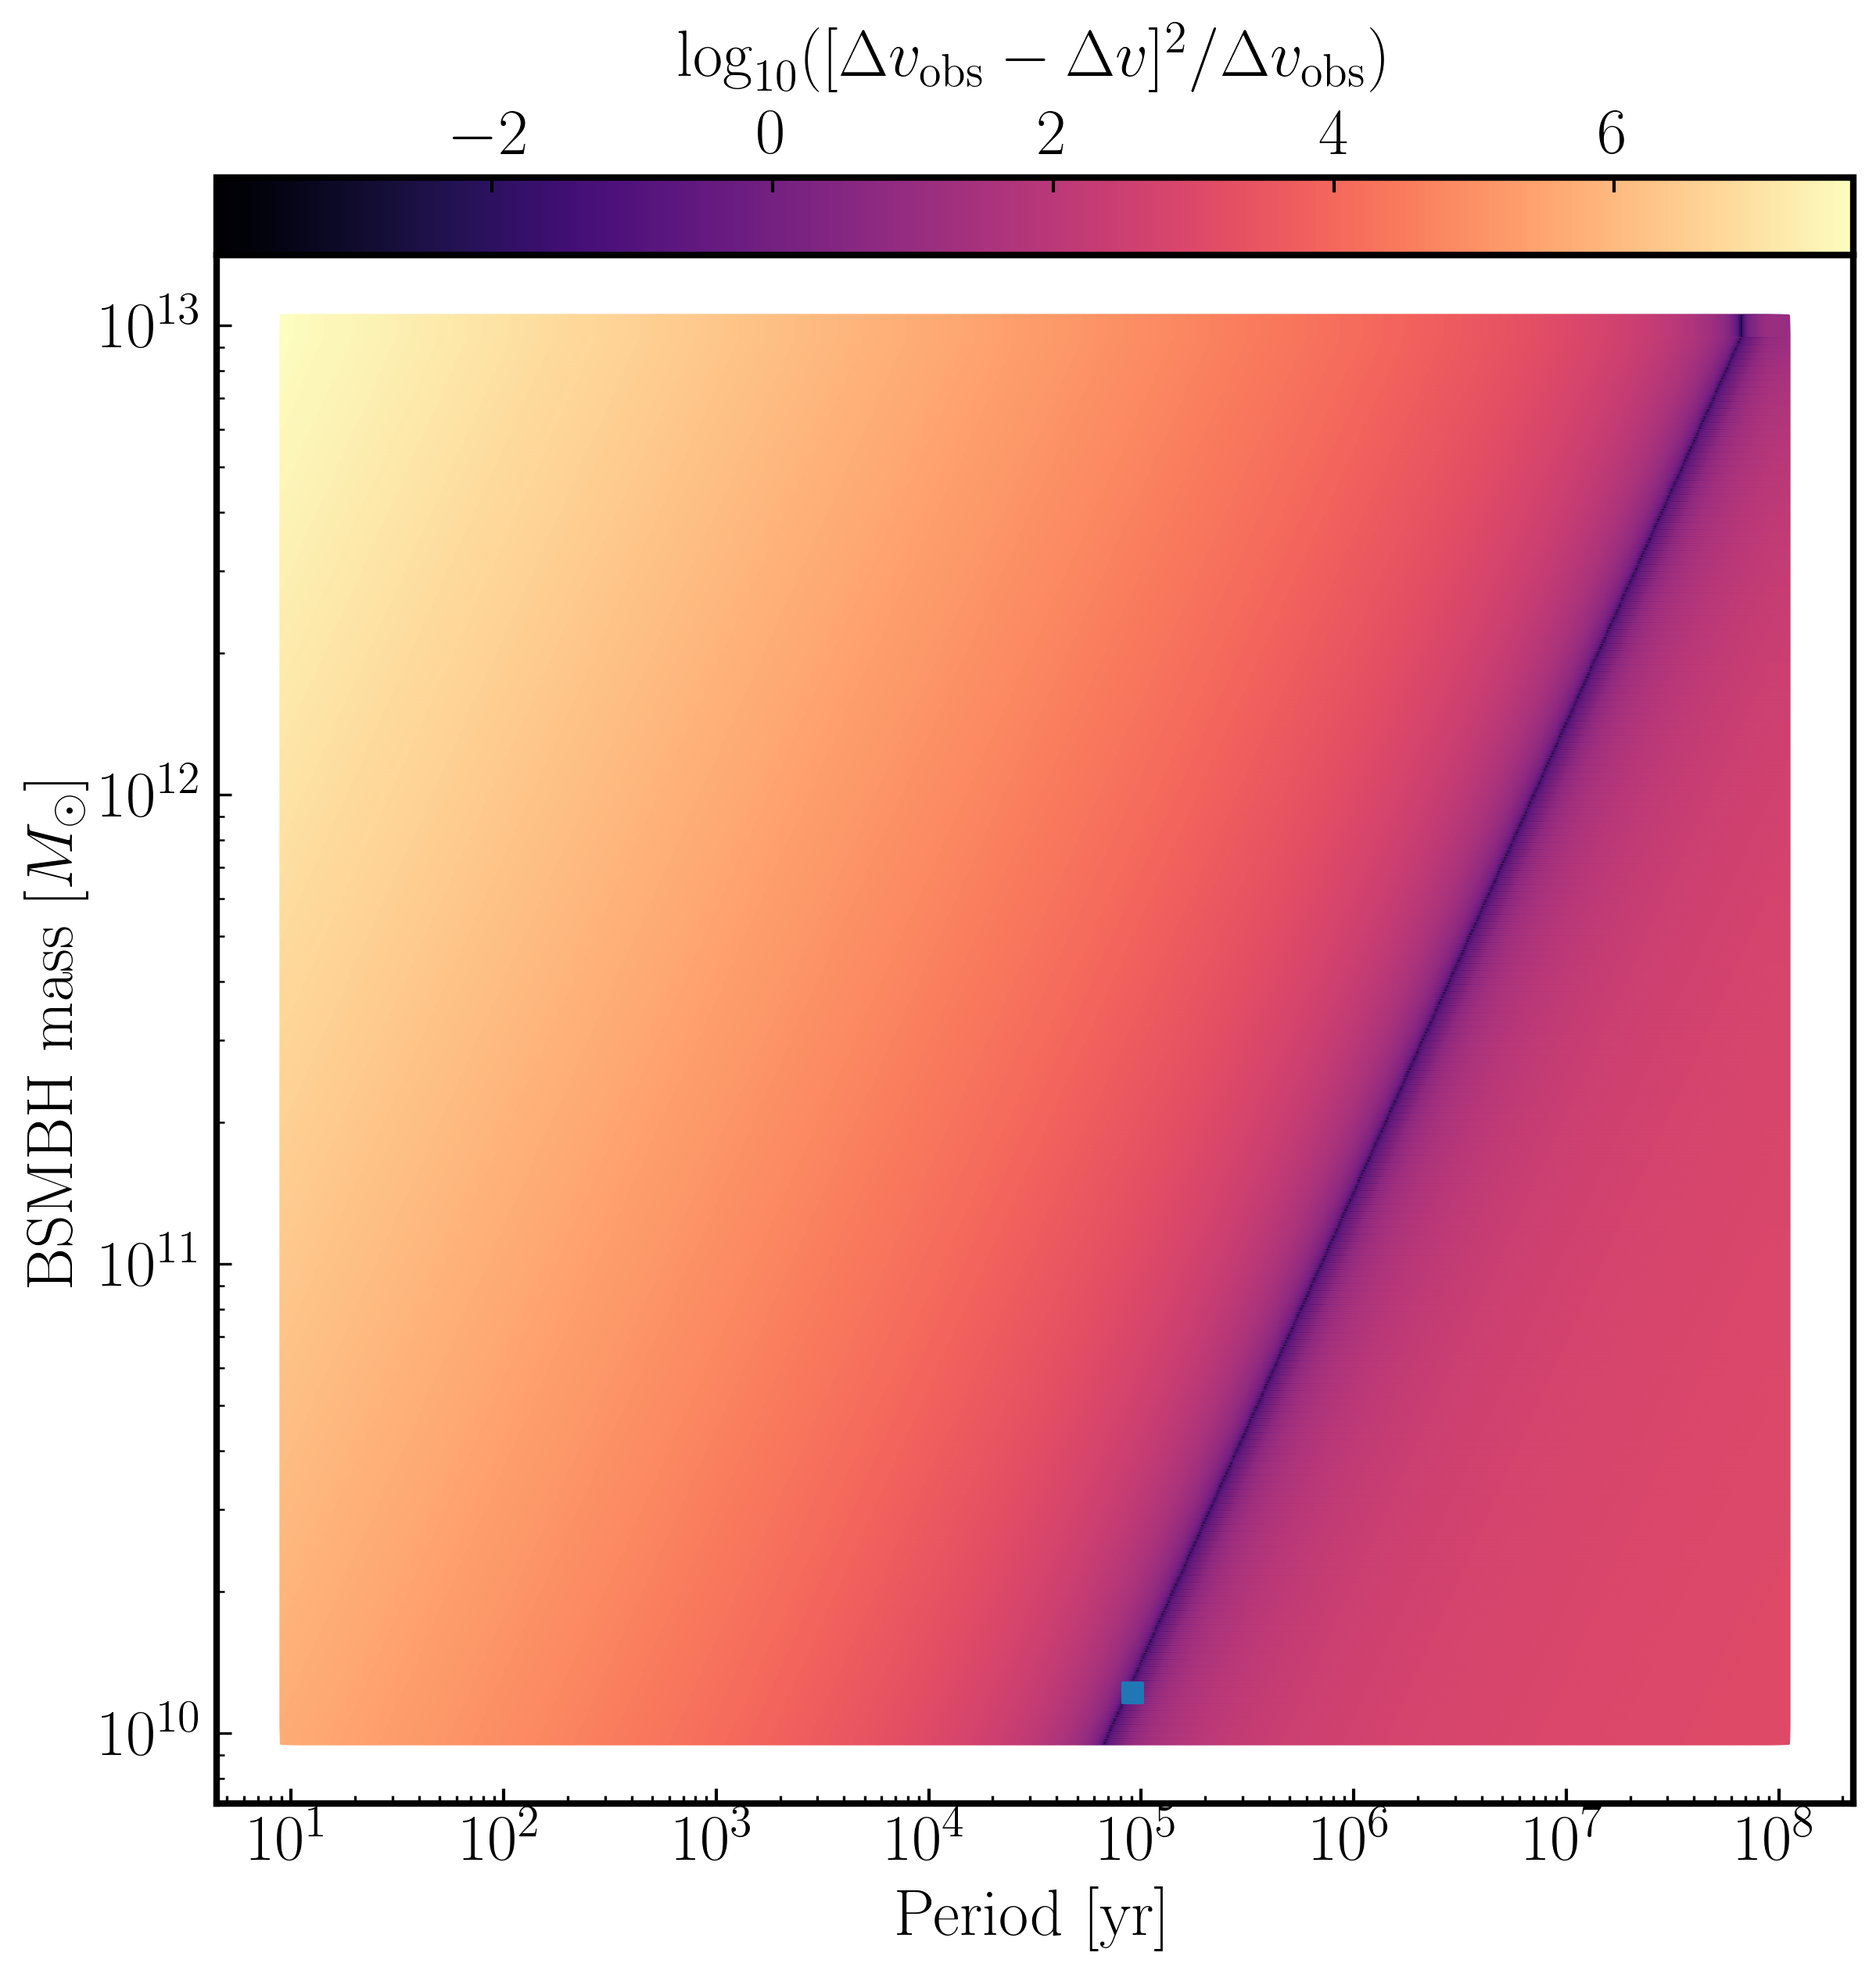

In [24]:
### Chi squared plot
chi2 = ((dv_obs-dv)**2)/dv_obs
fig = plt.figure(figsize=(9,9))
gs=GridSpec(ncols=1,nrows=2,height_ratios=[1/20,1],hspace=0)
ax = fig.add_subplot(gs[1])
im= ax.scatter(P_yr,STM_yr,c=np.log10(chi2))
ax.scatter(P_obs,STM_obs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Period [yr]')
ax.set_ylabel('BSMBH mass [$M_\odot$]')

cax=fig.add_subplot(gs[0])
fig.colorbar(mappable=im,cax=cax,location='top')
cax.set_xlabel('$\log_{10}([\Delta v_\mathrm{obs} - \Delta v]^2 / \Delta v_\mathrm{obs}$)',labelpad=10)
plt.show()